In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline  
import seaborn as sns

/Users/mattia/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# reads dataframe with all stations and prepares columns for data to add
# df=pd.read_csv('stations.csv')

# from Nick: files with elevation of the street
df=pd.read_csv('station_elevation_closest_10.csv')

In [4]:
df['file_scraped']=df.name.apply(lambda x: 'scrape/out/'+str(x)+'_allyear.csv')

df.h=df.h-df.street_elevation #meters to feet
df=df.dropna()

df.head()

,Unnamed: 0,name,lat,lon,h,street_elevation,building_elevation,file_scraped
0,0,KNYBROOK41,40.600,-73.948,10.069001,8.792996,39.583460,scrape/out/KNYBROOK41_allyear.csv
1,1,KNYBROOK40,40.717,-73.963,53.054570,32.836291,76.218000,scrape/out/KNYBROOK40_allyear.csv
2,2,KNYBROOK54,40.624,-74.013,79.007246,29.978261,110.081000,scrape/out/KNYBROOK54_allyear.csv
3,3,KNYBROOK49,40.695,-73.928,43.824504,54.526489,111.238000,scrape/out/KNYBROOK49_allyear.csv
4,4,KNYBROOK51,40.714,-73.948,28.054570,32.836291,35.341226,scrape/out/KNYBROOK51_allyear.csv


In [5]:
# add data from different days - months - ecc, reading the scraped files scrape/out/XXXXXXXXX.csv

df['TemperatureHighMeanJulyF']=[0]*len(df)
df['TemperatureAvgMeanJulyF']=[0]*len(df)
df['HumidityHighMeanJuly']=[0]*len(df)
df['HumidityAvgMeanJuly']=[0]*len(df)
df['TemperatureHighMeanAugustF']=[0]*len(df)
df['TemperatureAvgMeanAugustF']=[0]*len(df)
df['TemperatureHighMeanFebF']=[0]*len(df)
df['TemperatureAvgMeanFebF']=[0]*len(df)
df['TemperatureLowMeanFebF']=[0]*len(df)
df['TemperatureHighMeanOctoberF']=[0]*len(df)
df['TemperatureHighMeanSeptemberF']=[0]*len(df)


df=df[0:245]
df=df[df.file_scraped != 'scrape/out/nan_allyear.csv']
for index, row in df.iterrows():
    address=row['file_scraped']
    print address
    df_single=pd.read_csv(address)
    df_single=df_single.dropna()
    df_single['Month']=df_single.Date.apply(lambda x: x.split('-')[1])
    
    avg_August=df_single[df_single.Month == '8'].TemperatureAvgF.mean()
    if np.isnan(avg_August):
        avg_August = -1
    df.set_value(index,'TemperatureAvgMeanAugustF',avg_August)
    
    avg_August=df_single[df_single.Month == '8'].TemperatureHighF.mean()
    if np.isnan(avg_August):
        avg_August = -1
    df.set_value(index,'TemperatureHighMeanAugustF',avg_August)
  
    avg_August=df_single[df_single.Month == '8'].TemperatureLowF.mean()
    if np.isnan(avg_August):
        avg_August = -1
    df.set_value(index,'TemperatureLowMeanAugustF',avg_August)



    avg_July=df_single[df_single.Month == '7'].TemperatureAvgF.mean()
    if np.isnan(avg_July):
        avg_July = -1
    df.set_value(index,'TemperatureAvgMeanJulyF',avg_July)
    
    avg_July=df_single[df_single.Month == '7'].TemperatureHighF.mean()
    if np.isnan(avg_July):
        avg_July = -1
    df.set_value(index,'TemperatureHighMeanJulyF',avg_July)

    avg_July=df_single[df_single.Month == '7'].TemperatureLowF.mean()
    if np.isnan(avg_July):
        avg_July = -1
    df.set_value(index,'TemperatureLowMeanJulyF',avg_July)
    
    
    avg_July=df_single[df_single.Month == '7'].HumidityAvg.mean()
    if np.isnan(avg_July):
        avg_July = -1
    df.set_value(index,'HumidityAvgMeanJuly',avg_July)
    
    avg_July=df_single[df_single.Month == '7'].HumidityHigh.mean()
    if np.isnan(avg_July):
        avg_July = -1
    df.set_value(index,'HumidityHighMeanJuly',avg_July)   
    
    avg_July=df_single[df_single.Month == '8'].HumidityAvg.mean()
    if np.isnan(avg_July):
        avg_July = -1
    df.set_value(index,'HumidityAvgMeanAugust',avg_July)
    
    avg_July=df_single[df_single.Month == '8'].HumidityHigh.mean()
    if np.isnan(avg_July):
        avg_July = -1
    df.set_value(index,'HumidityHighMeanAugust',avg_July)   
    
    
    avg_Feb=df_single[df_single.Month == '2'].TemperatureAvgF.mean()
    if np.isnan(avg_Feb):
        avg_Feb = -1
    df.set_value(index,'TemperatureAvgMeanFebF',avg_Feb)
    
    avg_Feb=df_single[df_single.Month == '2'].TemperatureHighF.mean()
    if np.isnan(avg_Feb):
        avg_Feb = -1
    df.set_value(index,'TemperatureHighMeanFebF',avg_Feb)      

    avg_Feb=df_single[df_single.Month == '2'].TemperatureLowF.mean()
    if np.isnan(avg_Feb):
        avg_Feb = -1
    df.set_value(index,'TemperatureLowMeanFebF',avg_Feb)      
    
    # Sept
    avg_July=df_single[df_single.Month == '9'].TemperatureHighF.mean()
    if np.isnan(avg_July):
        avg_July = -1
    df.set_value(index,'TemperatureHighMeanSeptemberF',avg_July)

    # Oct
    avg_July=df_single[df_single.Month == '10'].TemperatureHighF.mean()
    if np.isnan(avg_July):
        avg_July = -1
    df.set_value(index,'TemperatureHighMeanOctoberF',avg_July)


    

scrape/out/KNYBROOK41_allyear.csv
scrape/out/KNYBROOK40_allyear.csv
scrape/out/KNYBROOK54_allyear.csv
scrape/out/KNYBROOK49_allyear.csv
scrape/out/KNYBROOK51_allyear.csv
scrape/out/KNYBROOK101_allyear.csv
scrape/out/KNYBROOK103_allyear.csv
scrape/out/KNYBROOK106_allyear.csv
scrape/out/KNYBROOK109_allyear.csv
scrape/out/KNYBROOK115_allyear.csv
scrape/out/KNYBROOK121_allyear.csv
scrape/out/KNYBROOK132_allyear.csv
scrape/out/KNYBROOK134_allyear.csv
scrape/out/KNYBROOK136_allyear.csv
scrape/out/KNYBROOK138_allyear.csv
scrape/out/KNYBROOK140_allyear.csv
scrape/out/KNYBROOK142_allyear.csv
scrape/out/KNYBROOK146_allyear.csv
scrape/out/KNYBROOK152_allyear.csv
scrape/out/KNYBROOK154_allyear.csv
scrape/out/KNYBROOK156_allyear.csv
scrape/out/KNYBROOK160_allyear.csv
scrape/out/KNYBROOK164_allyear.csv
scrape/out/KNYBROOK166_allyear.csv
scrape/out/KNYBROOK170_allyear.csv
scrape/out/KNYBROOK172_allyear.csv
scrape/out/KNYBROOK174_allyear.csv
scrape/out/KNYBROOK176_allyear.csv
scrape/out/KNYBROOK178_al

In [6]:
# read tree census
df_trees=pd.read_csv('data2015/2015_Street_Tree_Census_-_Tree_Data.csv')


In [25]:


df_trees['lat']=df_trees.latitude
df_trees['lon']=df_trees.longitude

df=df[(df.lon < -73.8) &(df.lat < 40.82)] # select NYC 
 
df['Trees']=[-1]*len(df) # number os trees in some radius

radius=0.0003 # ~25m with haversine formula


for index, row in df.iterrows():   
    sel = (df_trees.lat > (row['lat']-0.01))&(df_trees.lat < (row['lat']+0.01)) & (df_trees.lon > (row['lon']-0.01))&(df_trees.lon < (row['lon']+0.01))
    if index % 25 == 0:
        print index
    if sum(sel) > 0:
        a=df_trees[sel].apply(lambda x:(x.lat-row['lat'])**2 + (x.lon-row['lon'])**2 <= radius**2,axis=1).sum()
        df=df.set_value(index,'Trees',a)
    
    
    

0
25
50
75
100
125
150
175
200


1


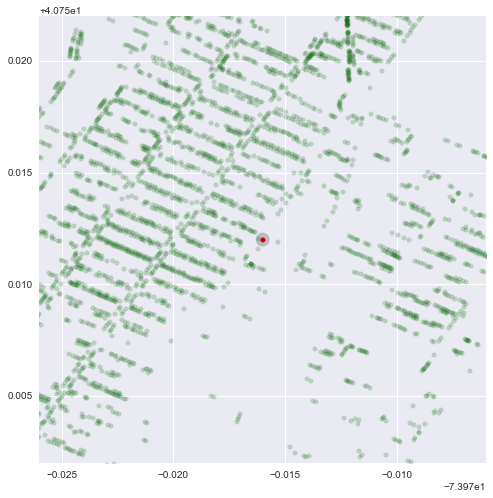

In [182]:
# fig,ax=plt.figure(figsize=(8,12))
plt.figure(figsize=(8,8))
ax=plt.subplot(aspect='equal')

index=125
plt.scatter(df_trees.lon, df_trees.lat, alpha=0.2, color='darkgreen')
plt.scatter(df.iloc[index].lon, df.iloc[index].lat, color='red')
plt.xlim([df.iloc[index].lon-0.01,df.iloc[index].lon+0.01])
plt.ylim([df.iloc[index].lat-0.01,df.iloc[index].lat+0.01])
circle1=plt.Circle((df.iloc[index].lon,df.iloc[index].lat),0.0003,color='black',alpha=0.2)
plt.gcf().gca().add_artist(circle1)

print df.iloc[index].Trees

10 81.4285714286 85.8571428571 4.42857142857 2.64575131106 2.58988088398
20 84.75 86.0833333333 1.33333333333 3.46410161514 2.15014093971
30 84.8235294118 86.7222222222 1.89869281046 4.24264068712 1.58864373833
40 85.12 87.0 1.88 4.89897948557 1.22925451663
50 86.2941176471 87.1071428571 0.813025210084 5.29150262213 1.11506409475
60 86.7317073171 87.4054054054 0.673698088332 6.0827625303 0.966527850433
80 87.1914893617 87.0 -0.191489361702 6.32455532034 1.0117891106
100 86.8448275862 87.0434782609 0.198650674663 6.78232998313 0.866392666028
150 86.6229508197 87.0 0.377049180328 7.21110255093 0.835079242477
200 86.3857142857 86.737704918 0.351990632319 7.81024967591 0.761194674279
TemperatureHighMeanAugustF


(-20, 220)

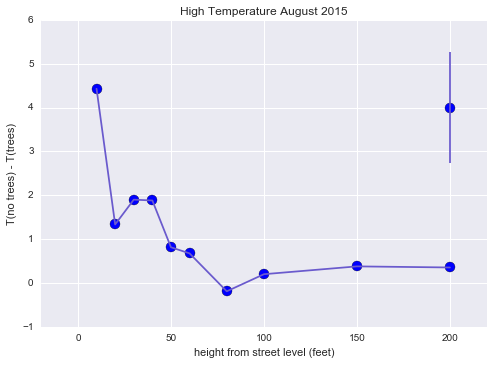

In [178]:
metric='TemperatureHighMeanAugustF'
h = [-1,10,20,30,40,50,60,80,100,150,200,300]
diffs = []
errs = []
length = []
howmanytrees= 1
for i in range(0,len(h)-2):
    height_min=h[i]
    height_max=h[i+1]
    sel=(df[metric] > 0) &(df.Trees > -1) & (df.h <= height_max)   & (df.h <= height_min) 
    mean_low_trees = df[(df.Trees > howmanytrees ) & sel][metric].mean()
    mean_low_notrees  = df[(df.Trees <= howmanytrees ) & sel][metric].mean()
    std_low_trees = df[(df.Trees > howmanytrees ) & sel][metric].std()
    std_low_notrees  = df[(df.Trees <= howmanytrees ) & sel][metric].std()

    N_no=len(df[(df.Trees <= howmanytrees ) & sel])
    N_trees=len(df[(df.Trees > howmanytrees ) & sel])
    mean_low_trees_err = std_low_trees / np.sqrt(N_trees)
    mean_low_notrees_err = std_low_notrees / np.sqrt(N_no)
    err=np.sqrt(mean_low_trees_err**2+mean_low_notrees_err**2)/3
    diff=mean_low_notrees-mean_low_trees
    print height_max ,mean_low_trees, mean_low_notrees,diff,np.sqrt(N_no),mean_low_trees_err 
    errs.append(err)
    diffs.append(diff)
    length.append(N_no+N_trees)

# plt.errorbar(h[1:-1],diffs,errs, color='slateblue')
plt.plot(h[1:-1],diffs, color='slateblue')
plt.scatter(h[1:-1],diffs,s=100)
plt.errorbar([200],[4],errs[0], color='slateblue')
plt.scatter([200],[4],s=100)
plt.ylabel('T(no trees) - T(trees)')
print metric
plt.title('High Temperature August 2015')
plt.xlabel('height from street level (feet)')
plt.xlim([-20,220])

10 64.5969232632 67.6304848728 3.03356160958 3.0 3.9328023096
20 66.6846234327 70.7692714407 4.08464800807 3.60555127546 3.16082202347
30 68.2780030223 70.0509380774 1.77293505517 4.472135955 2.6147300809
40 67.2524667308 71.1158580744 3.86339134361 5.09901951359 2.1565603092
50 68.3092422459 70.4456669817 2.13642473579 5.74456264654 1.87807037916
60 68.9126716858 71.5120432753 2.59937158947 6.5574385243 1.72234539799
80 69.6550074041 71.0950405595 1.44003315548 6.92820323028 1.64839772344
100 69.8127555245 71.3561620498 1.54340652531 7.54983443527 1.50088025758
150 70.1205708382 71.5031383774 1.38256753923 7.93725393319 1.4281737732
200 70.7843151099 71.7825479361 0.998232826189 8.60232526704 1.31169948733
HumidityHighMeanAugust


(-20, 220)

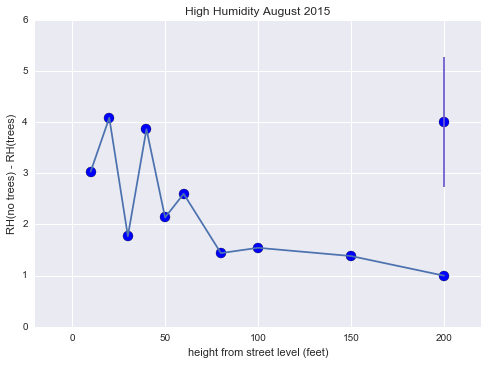

In [180]:
h = [0,10,20,30,40,50,60,80,100,150,200,300]
diffs = []
length = []
howmanytrees= 2
metric='HumidityHighMeanAugust'
for i in range(0,len(h)-2):
    height_min=h[i]
    height_max=h[i+1]
    sel=(df[metric] > 0) &(df.Trees > -1) & (df.h <= height_max)  & (df.h <= height_min) 
    mean_low_trees = df[(df.Trees > howmanytrees ) & sel][metric].mean()
    mean_low_notrees  = df[(df.Trees <= howmanytrees ) & sel][metric].mean()
    std_low_trees = df[(df.Trees > howmanytrees ) & sel][metric].std()
    std_low_notrees  = df[(df.Trees <= howmanytrees ) & sel][metric].std()

    N_no=len(df[(df.Trees <= howmanytrees ) & sel])
    N_trees=len(df[(df.Trees > howmanytrees ) & sel])
    mean_low_trees_err = std_low_trees / np.sqrt(N_trees)
    mean_low_notrees_err = std_low_notrees / np.sqrt(N_no)
    diff=mean_low_notrees-mean_low_trees
    print height_max,mean_low_trees, mean_low_notrees ,diff,np.sqrt(N_no),mean_low_trees_err 
    diffs.append(diff)
    length.append(N_no+N_trees)

# plt.errorbar(h[1:-1],diffs,errs, color='slateblue')
plt.plot(h[1:-1],diffs)

plt.ylabel('T(no-yes)')
plt.title(metric)
plt.xlabel('<h')

plt.errorbar([200],[4],errs[0], color='slateblue')
plt.scatter([200],[4],s=100)
plt.scatter(h[1:-1],diffs,s=100)
plt.ylabel('RH(no trees) - RH(trees)')
print metric
plt.title('High Humidity August 2015')
plt.xlabel('height from street level (feet)')
plt.xlim([-20,220])

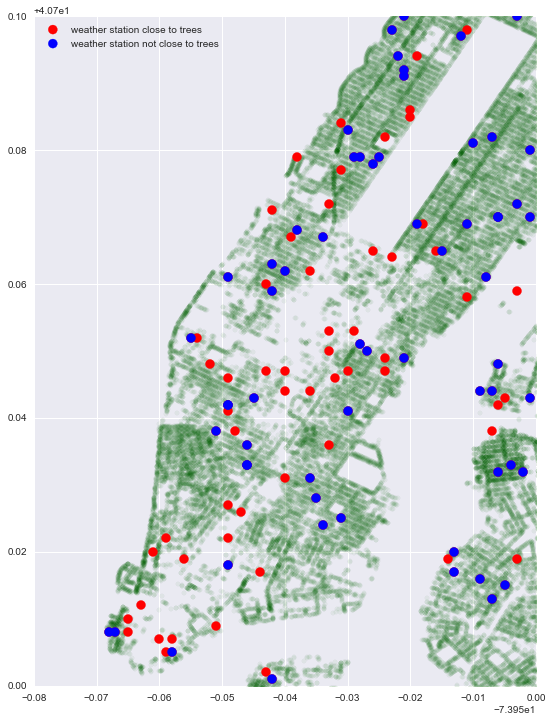

In [98]:
plt.figure(num=None, figsize=(9, 12), dpi=80, facecolor='w', edgecolor='k')


plt.ylim([40.7,40.8])

plt.xlim([-74-0.03,-73.9-0.05])
plt.scatter(df_trees.lon, df_trees.lat, alpha=0.05, color='darkgreen',label='')


plt.scatter(df[(df.Trees > -1 )].lon,
    df[(df.Trees > -1 )].lat, color='red', s=82, label='weather station close to trees')
plt.scatter(df[(df.Trees > 2 )].lon,
    df[(df.Trees > 2 )].lat, color='blue', s=82, label='weather station not close to trees')
plt.legend(loc=2)



In [177]:
diff_low=[]
diff_high=[]
height=50
for metric in ['TemperatureHighMeanJulyF','TemperatureHighMeanAugustF','TemperatureHighMeanSeptemberF','TemperatureHighMeanOctoberF'] :              
    mean_low_trees = df[(df[metric] > 0) &(df.Trees > -1) & (df.Trees > howmanytrees )& (df.h <= height)][metric].mean()
    mean_low_notrees  = df[(df[metric] > 0) & (df.Trees > -1) & (df.Trees <= howmanytrees )& (df.h <= height)][metric].mean()
    mean_high_trees = df[(df[metric] > 0) & (df.Trees > -1) & (df.Trees > howmanytrees )& (df.h > height)][metric].mean()
    mean_high_notrees=df[(df[metric] > 0) & (df.Trees > -1) & (df.Trees <= howmanytrees )& (df.h > height)][metric].mean()
    diff_low.append(mean_low_notrees-mean_low_trees)
    diff_high.append(mean_high_notrees-mean_high_trees) 

In [ ]:
df[['name','lat','lon','h','TemperatureHighMeanAugustF','HumidityHighMeanAugust']].to_csv('temperature_humidity_stations.csv')

In [176]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km*1000 #return meters
print haversine(-74,  40.7128, -74.0003,  40.7128)


25.2694719922


In [181]:

# heat_index=c1+c2*T+c3*R+c4*T*R+c5*T**2+c6*R**2+c7*T**2*R+c8*T*R**2+c9*T**2*R**2

def heat_index(T,R):
    c1 = -42.38
    c2 = 2.049
    c3 = 10.1
    c4 = -0.2248 
    c5 = -0.006838
    c6 = -0.05482
    c7 = 0.001228
    c8 = 0.0008528
    c9 = -0.00000199
    return c1+c2*T+c3*R+c4*T*R+c5*T**2+c6*R**2+c7*T**2*R+c8*T*R**2+c9*T**2*R**2

T=df.TemperatureHighMeanAugustF[df.TemperatureHighMeanAugustF>0].median()
R=df.HumidityHighMeanAugust[df.HumidityHighMeanAugust>0].median()

print heat_index(T,R)
print heat_index(T+4.5,R+3.5)

92.6708142777
108.468378688
